In [16]:
#Importing required libraries

import pandas as pd
import numpy as np
import re
from datetime import date, timedelta
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

In [2]:
#Reading Purchase behaviour file

df_purchase_behaviour = pd.read_csv('QVI_purchase_behaviour.csv')

In [3]:
#Reading Transaction data file

df_transaction_data = pd.read_excel('QVI_transaction_data.xlsx')

In [4]:
#Converting the Number of days from origin to date-time in transaction data

start = date(1899,12,30)

new_date_format = []

for date in df_transaction_data["DATE"]:
    days = timedelta(date)
    new_date_format.append(start + days)
    
df_transaction_data['DATE'] = new_date_format

In [5]:
#Generating the fequency chart for every word present in the product name in transaction data.

pname = df_transaction_data['PROD_NAME']
pname = list(pname)

product_name = []

for product in pname :
    product_name.append(product[:-4])
    
product_freq = {}    

for item in product_name:
    wordList = re.sub("[^\w]", " ",  item).split()
    for word in wordList:
        if word not in product_freq:
            product_freq[word] = 0
        else:
            product_freq[word] += 1
            
product_freq

{'Natural': 6049,
 'Chip': 18644,
 'Compny': 1467,
 'SeaSalt': 1467,
 'CCs': 4550,
 'Nacho': 4657,
 'Cheese': 27889,
 'Smiths': 28859,
 'Crinkle': 23959,
 'Cut': 20753,
 'Chips': 49769,
 'Chicken': 18576,
 'Thinly': 7506,
 'S': 2933,
 'Cream': 16925,
 'Onion': 6115,
 'Kettle': 41287,
 'Tortilla': 9579,
 'ChpsHny': 3295,
 'Jlpno': 3295,
 'Chili': 3295,
 'Old': 9323,
 'El': 9323,
 'Paso': 9323,
 'Salsa': 18093,
 'Dip': 9323,
 'Tomato': 7668,
 'Mild': 6047,
 'Salt': 24718,
 'Vinegar': 12401,
 'Grain': 6271,
 'Waves': 6271,
 'Sweet': 11059,
 'Chilli': 15389,
 'Doritos': 24961,
 'Corn': 22062,
 'Mexican': 3203,
 'Jalapeno': 3203,
 'Sour': 13881,
 'Chives': 10950,
 'Sensations': 9428,
 'Siracha': 3126,
 'Lime': 9346,
 'Twisties': 9453,
 'WW': 10319,
 'Thins': 14074,
 'Light': 3187,
 'Tangy': 6331,
 'Original': 21559,
 'Burger': 4732,
 'Rings': 3079,
 'NCC': 1418,
 'Garden': 1418,
 'Southern': 3171,
 'Cheezels': 4602,
 'Box': 1453,
 'Infzns': 3143,
 'Crn': 3143,
 'Crnchers': 3143,
 'Gcamole':

In [6]:
#Sorting product frequency in descinding order acording to its value.

from collections import OrderedDict

product_freq = OrderedDict(sorted(product_freq.items(), key=lambda kv: kv[1], reverse=True))

In [7]:
#Removing products from the transaction data dataframe which have Salsa present in its product name.

df_transaction_data.drop(df_transaction_data[df_transaction_data['PROD_NAME'].str.contains('Salsa')].index, inplace=True)

In [8]:
#Summary of the data from transaction data dataframe.

summary = df_transaction_data.describe()

summary = summary.transpose()

summary

,count,mean,std,min,25%,50%,75%,max
STORE_NBR,246742.0,135.051098,76.787096,1.0,70.00,130.0,203.00,272.0
LYLTY_CARD_NBR,246742.0,135530.984956,80715.280765,1000.0,70015.00,130367.0,203084.00,2373711.0
TXN_ID,246742.0,135131.098848,78147.717692,1.0,67569.25,135183.0,202653.75,2415841.0
PROD_NBR,246742.0,56.351789,33.695428,1.0,26.00,53.0,87.00,114.0
PROD_QTY,246742.0,1.908062,0.659831,1.0,2.00,2.0,2.00,200.0
TOT_SALES,246742.0,7.321322,3.077828,1.7,5.80,7.4,8.80,650.0


In [9]:
#Checking if any column has a null value(NaN)?

df_transaction_data_columns = df_transaction_data.columns

for val in df_transaction_data_columns:
    print(val+' : '+str(df_transaction_data[val].isnull().values.any()))

DATE : False
STORE_NBR : False
LYLTY_CARD_NBR : False
TXN_ID : False
PROD_NBR : False
PROD_NAME : False
PROD_QTY : False
TOT_SALES : False


In [10]:
# Here we have one outliner according to summary displayed above, and that it max quantity ordered for
# a packet of chips in a single go is 200 which is weird!

df_transaction_data[df_transaction_data['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [11]:
#Getting the loyality card number of this customer to identify if the same customer has made other transactions.

lylty_card_no_index = df_transaction_data[df_transaction_data['PROD_QTY'] == 200].index

x = df_transaction_data['LYLTY_CARD_NBR'][df_transaction_data.index == lylty_card_no_index[0]]
val = x.get(lylty_card_no_index[0])
df_transaction_data[df_transaction_data['LYLTY_CARD_NBR'] == val]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [12]:
#It looks like this customer has only had the two transactions over the year and is
#not an ordinary retail customer. The customer might be buying chips for commercial
#purposes instead. We'll remove this loyalty card number from further analysis.

df_transaction_data.drop(df_transaction_data[df_transaction_data['LYLTY_CARD_NBR'] == val].index, inplace=True)

In [13]:
#Re- examining the data.

summary = df_transaction_data.describe()

summary = summary.transpose()

summary

,count,mean,std,min,25%,50%,75%,max
STORE_NBR,246740.0,135.050361,76.786971,1.0,70.00,130.0,203.00,272.0
LYLTY_CARD_NBR,246740.0,135530.251641,80715.196924,1000.0,70015.00,130367.0,203083.25,2373711.0
TXN_ID,246740.0,135130.360627,78147.604242,1.0,67568.75,135181.5,202652.25,2415841.0
PROD_NBR,246740.0,56.352213,33.695235,1.0,26.00,53.0,87.00,114.0
PROD_QTY,246740.0,1.906456,0.342499,1.0,2.00,2.0,2.00,5.0
TOT_SALES,246740.0,7.316113,2.474897,1.7,5.80,7.4,8.80,29.5


In [14]:
#Counting number of transactions on each day to see if there is some missing date or not.

df_transactions = pd.DataFrame(df_transaction_data.DATE.value_counts())
df_transactions.rename(columns={'DATE':'Transactions'},inplace=True)
df_transactions.index = pd.to_datetime(df_transactions.index)

df_transactions

,Transactions
2018-12-24,865
2018-12-23,853
2018-12-22,840
2018-12-19,839
2018-12-20,808
...,...
2019-06-24,612
2018-10-18,611
2018-11-25,610
2018-09-22,609


In [17]:
#There's only 364 rows, meaning only 364 dates which indicates a missing date. 

#Creating a sequence of dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a
#chart of number of transactions over time to find the missing date.

sdate = date(2018,7,1)   # start date
edate = date(2019,6,30)   # end date

df_dates = pd.DataFrame(pd.date_range(sdate,edate,freq='d'))

df_dates.rename(columns={0:'Dates'},inplace=True)

df_dates.set_index('Dates',inplace=True)
df_dates

""
Dates
2018-07-01
2018-07-02
2018-07-03
2018-07-04
2018-07-05
...
2019-06-26
2019-06-27
2019-06-28


In [18]:
#Performing join on both dataframes
df_check_date = pd.merge(df_dates, df_transactions, how='left',left_index=True, right_index=True)
df_check_date

,Transactions
Dates,
2018-07-01,663.0
2018-07-02,650.0
2018-07-03,674.0
2018-07-04,669.0
2018-07-05,660.0
...,...
2019-06-26,657.0
2019-06-27,669.0
2019-06-28,673.0


In [19]:
df_check_date[df_check_date['Transactions'].isnull()].index

#Missing date id 2018-12-25 i.e. 25th December 2018

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', name='Dates', freq=None)

In [20]:
#Selecting dates for the month of December

start_date = pd.to_datetime('2018-12-1')   # start date
end_date = pd.to_datetime('2018-12-31')    # end date

mask = (df_check_date.index >= start_date) & (df_check_date.index <= end_date)
df_plot_date = df_check_date.loc[mask]

df_plot_date['Transactions'] = df_plot_date['Transactions'].fillna(0)


<ipython-input-20-fc28c477960f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_date['Transactions'] = df_plot_date['Transactions'].fillna(0)


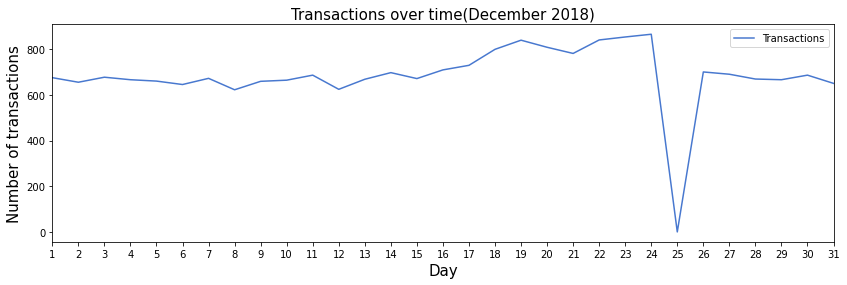

In [21]:
#Zoomin in and plotting december dates with its transactions
style.use('seaborn-muted')
df_plot_date.plot(figsize=(14,4))
plt.yticks([0,200,400,600,800])
plt.xticks(df_plot_date.index,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])
plt.title('Transactions over time(December 2018)',fontsize=15)
plt.xlabel('Day',fontsize=15)
plt.ylabel('Number of transactions',fontsize=15);

In [22]:
#We can see that the increase in sales occurs in the lead-up to Christmas and that
#there are zero sales on Christmas day itself. This is due to shops being closed on Christmas day.

In [23]:
#Now that we are satisfied that the data no longer has outliers, we can move on to
#creating other features such as brand of chips or pack size from PROD_NAME. We will
#start with pack size.

In [24]:
pack_size = []
product_name = df_transaction_data["PROD_NAME"]
for item in product_name:
    if(item == 'Kettle 135g Swt Pot Sea Salt'):
        pack_size.append(int(item[7:10]))
    else:
        pack_size.append(int(item[-4:-1]))
    
print('Minimum'+" : "+str(min(pack_size)))
print('Maximum'+" : "+str(max(pack_size)))

#The largest size is 380g and the smallest size is 70g - seems sensible!

Minimum : 70
Maximum : 380


In [25]:
#Making a new column named pack size.

df_transaction_data['PACK_SIZE'] = pack_size

Text(0.5, 1.0, 'Freq. of size of packets sold')

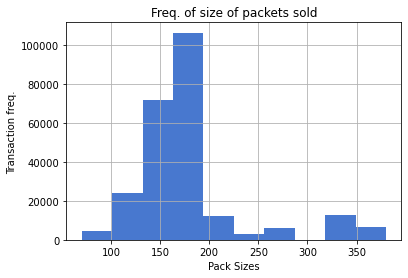

In [26]:
df_transaction_data['PACK_SIZE'].hist()
plt.xlabel('Pack Sizes')
plt.ylabel('Transaction freq.')
plt.title('Freq. of size of packets sold')

In [27]:
#Getting brand names from product names and making a seprate column for that in transaction data frame.

brand_names = []

for item in product_name:
    words = item.split(' ')
    brand_names.append(words[0])


In [28]:
#Frequency of occourence of each brand.

from collections import Counter as counter

counter(brand_names)

Counter({'Natural': 6050,
         'CCs': 4551,
         'Smiths': 27390,
         'Kettle': 41288,
         'Grain': 6272,
         'Doritos': 22041,
         'Twisties': 9454,
         'WW': 10320,
         'Thins': 14075,
         'Burger': 1564,
         'NCC': 1419,
         'Cheezels': 4603,
         'Infzns': 3144,
         'Red': 4427,
         'Pringles': 25102,
         'Dorito': 3183,
         'Infuzions': 11057,
         'Smith': 2963,
         'GrnWves': 1468,
         'Tyrrells': 6442,
         'Cobs': 9693,
         'French': 1418,
         'RRD': 11894,
         'Tostitos': 9471,
         'Cheetos': 2927,
         'Woolworths': 1516,
         'Snbts': 1576,
         'Sunbites': 1432})

In [29]:
#Replacing NCC with Natural Chip Co, Natural with Natural Chip Co,Smith with Smiths, Dorito with Doritos, WW with Woolworths, RRD with Red, Snbts with Sunbites,
#Grain with Grain Waves, GrnWves with Grain Waves, Infzns with Infuzions.

for index,element in enumerate(brand_names):
    if(element == 'NCC' or element == 'Natural'):
        brand_names[index] = 'Natural Chip Co'
    
    if(element == 'Smith'):
        brand_names[index] = 'Smiths'
        
    if(element == 'Dorito'):
        brand_names[index] = 'Doritos'
        
    if(element == 'WW'):
        brand_names[index] = 'Woolworths'
        
    if(element == 'RRD'):
        brand_names[index] = 'Red'
        
    if(element == 'Grain' or element == 'GrnWves'):
        brand_names[index] = 'Grain Waves'
        
    if(element == 'Infzns'):
        brand_names[index] = 'Infuzions'
    

In [30]:
#Frequency of occourence of each brand.

from collections import Counter as counter

brand_dict = counter(brand_names)

brand_dict

Counter({'Natural Chip Co': 7469,
         'CCs': 4551,
         'Smiths': 30353,
         'Kettle': 41288,
         'Grain Waves': 7740,
         'Doritos': 25224,
         'Twisties': 9454,
         'Woolworths': 11836,
         'Thins': 14075,
         'Burger': 1564,
         'Cheezels': 4603,
         'Infuzions': 14201,
         'Red': 16321,
         'Pringles': 25102,
         'Tyrrells': 6442,
         'Cobs': 9693,
         'French': 1418,
         'Tostitos': 9471,
         'Cheetos': 2927,
         'Snbts': 1576,
         'Sunbites': 1432})

In [31]:
#Now the results of brand names look resonable and correct.
df_transaction_data['BRAND_NAME'] = brand_names 

In [32]:
index = []
values = []

brand_dict = dict(brand_dict)

for i,v in brand_dict.items():
    index.append(i)
    values.append(v)

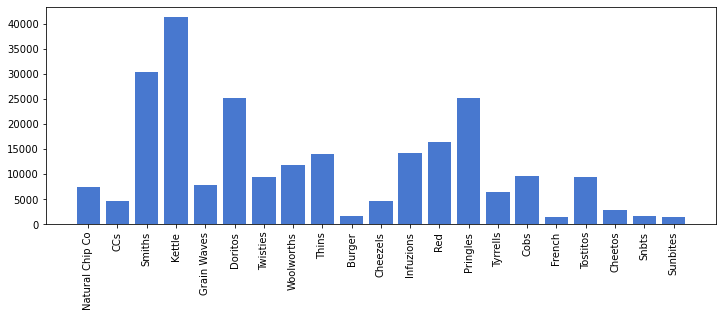

In [33]:
plt.figure(figsize=(12,4))
plt.bar(index,values)
plt.xticks(rotation=90);

In [34]:
df_purchase_behaviour

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [35]:
#Merging df_transaction_data and df_purchase_behaviour

df_merged = df_transaction_data.merge(df_purchase_behaviour,how='inner',left_on=['LYLTY_CARD_NBR'],right_on=['LYLTY_CARD_NBR'])

df_merged

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural Chip Co,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160,Woolworths,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,175,CCs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,Kettle,YOUNG SINGLES/COUPLES,Premium
246736,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,Tostitos,YOUNG SINGLES/COUPLES,Premium
246737,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,Doritos,YOUNG SINGLES/COUPLES,Premium
246738,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,Doritos,YOUNG SINGLES/COUPLES,Premium


In [36]:
#Checking if any column has a null value(NaN)?

df_merged_columns = df_merged.columns

for val in df_merged_columns:
    print(val+' : '+str(df_merged[val].isnull().values.any()))
    
#Hence we conclude that all the values from both the DataFrames were matched with each other correctly.

DATE : False
STORE_NBR : False
LYLTY_CARD_NBR : False
TXN_ID : False
PROD_NBR : False
PROD_NAME : False
PROD_QTY : False
TOT_SALES : False
PACK_SIZE : False
BRAND_NAME : False
LIFESTAGE : False
PREMIUM_CUSTOMER : False


In [37]:
#Saving this Dataframe for utilization in further tasks.

df_merged.to_csv('QVI_data.csv',index=False)

Now that the data is ready for analysis, we can define some metrics of interest to
the client:

- Who spends the most on chips (total sales), describing customers by lifestage and
  how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment

In [38]:
#Grouping on the basis of Lifestage and Premium customers

df_grouped = df_merged.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).sum()

df_grouped

STORE_NBR  LYLTY_CARD_NBR  \
LIFESTAGE              PREMIUM_CUSTOMER                              
MIDAGE SINGLES/COUPLES Budget               641330       644440514   
                       Mainstream          1496281      1500774290   
                       Premium             1033933      1039707670   
NEW FAMILIES           Budget               380365       380867986   
                       Mainstream           287481       288014877   
                       Premium              201835       202109224   
OLDER FAMILIES         Budget              2881588      2891942530   
                       Mainstream          1780625      1782766792   
                       Premium             1403359      1404881088   
OLDER SINGLES/COUPLES  Budget              2318353      2332495098   
                       Mainstream          2265662      2279764274   
                       Premium             2222527      2228223157   
RETIREES               Budget              1917631      1927702126   
                       Mainstream          2745301      2753153856   
                       Premium             1655552      1660094379   
YOUNG FAMILIES         Budget              2410844      2415761554   
                       Mainstream          1634618      1641169212   
                       Premium             1457226      1461126913   
YOUNG SINGLES/COUPLES  Budget              1154509      1158321877   
                       Mainstream          2624060      2637061979   
                       Premium              809246       810354894   

                                             TXN_ID  PROD_NBR  PROD_QTY  \
LIFESTAGE              PREMIUM_CUSTOMER                                   
MIDAGE SINGLES/COUPLES Budget             642288813    268427      8883   
                       Mainstream        1500385149    615380     21213   
                       Premium           1034352880    428798     14400   
NEW FAMILIES           Budget             380789234    160008      5241   
                       Mainstream         287803734    121152      4060   
                       Premium            201992124     85084      2769   
OLDER FAMILIES         Budget            2881775837   1209817     41853   
                       Mainstream        1780679553    748698     25804   
                       Premium           1403077688    590961     20239   
OLDER SINGLES/COUPLES  Budget            2320298702    967613     32883   
                       Mainstream        2266525908    966120     32607   
                       Premium           2223619531    926743     31695   
RETIREES               Budget            1918399243    795190     26932   
                       Mainstream        2746520511   1121770     37677   
                       Premium           1657119016    690206     23266   
YOUNG FAMILIES         Budget            2412063244   1010965     34482   
                       Mainstream        1635696850    686662     23194   
                       Premium           1458192325    609895     20901   
YOUNG SINGLES/COUPLES  Budget            1154747066    487920     15500   
                       Mainstream        2625680359   1079249     36225   
                       Premium            810057414    333687     10575   

                                         TOT_SALES  PACK_SIZE  
LIFESTAGE              PREMIUM_CUSTOMER                        
MIDAGE SINGLES/COUPLES Budget             33345.70     817091  
                       Mainstream         84734.25    1973786  
                       Premium            54443.85    1328944  
NEW FAMILIES           Budget             20607.45     493541  
                       Mainstream         15979.70     383751  
                       Premium            10760.80     260765  
OLDER FAMILIES         Budget            156863.75    3776704  
                       Mainstream         96413.55    2319501  
                       Premium            75242.60    1815581  


Text(0.5, 1.0, 'Total sales based upon Lifestage and Premium Customer')

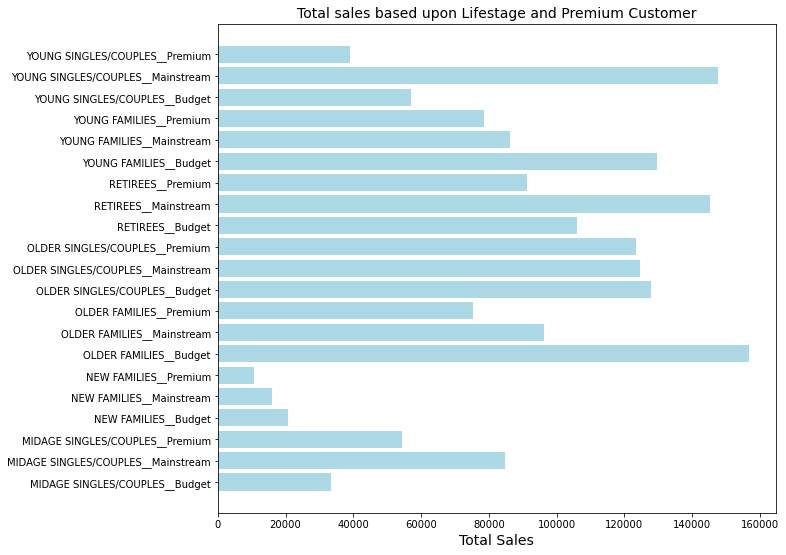

In [39]:
#Total sales plotted based upon lifestage and premium customers

index = df_grouped.index
values = df_grouped["TOT_SALES"]

result = []
for t in index: 
    result.append(t[0]+"__"+t[1])
    
plt.figure(figsize=(10,9))
plt.barh(result,values,color='lightblue')
plt.xlabel('Total Sales',fontsize=14)
plt.title('Total sales based upon Lifestage and Premium Customer',fontsize=14)
  

In [40]:
#Getting number of memebers present in each group.

group_count= pd.Series(df_merged.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['DATE'].count())
df_grouped['CUSTOMER_COUNT'] =  group_count.values

In [41]:
#Collecting number of all premium, budget and mainstream customers seprately.
#also calculating their total

lifestage = ['MIDAGE SINGLES/COUPLES','NEW FAMILIES','OLDER FAMILIES','OLDER SINGLES/COUPLES','RETIREES','YOUNG FAMILIES','YOUNG SINGLES/COUPLES']
Premium = []
Budget = []
Mainstream = []
all_values = []
for index,value in group_count.iteritems():
    if(index[1] == 'Premium'):
        Premium.append(value)
        all_values.append(value)
    elif(index[1] == 'Mainstream'):
        Mainstream.append(value)
        all_values.append(value)
    elif(index[1] == 'Budget'):
        Budget.append(value)
        all_values.append(value)

Total = sum(all_values)
   

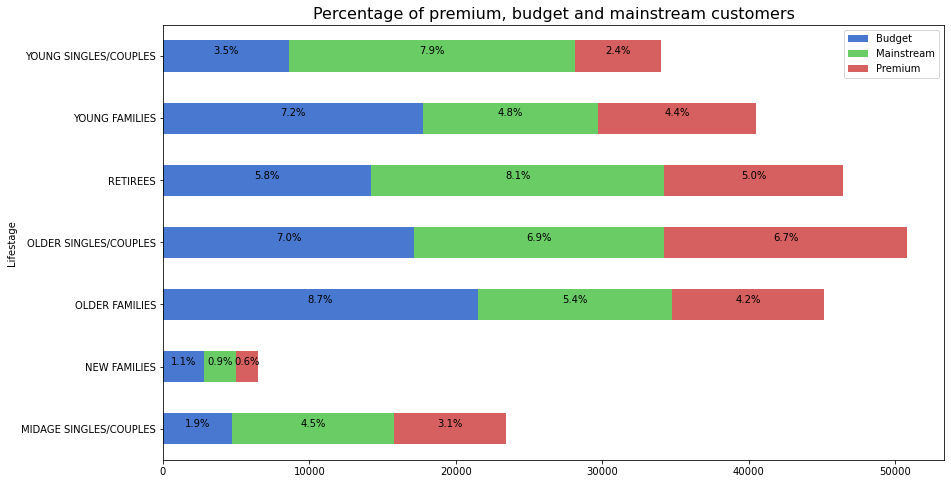

In [42]:
#Creating a dataframe based upon number of premium,budget and mainstream customersnumber of premium,budget and mainstream customers and calculating further for text annotation.
#Note: Here the percentage is calculated based upon number of customers in that group to total cutsomers.

df = pd.DataFrame({'Lifestage':lifestage,
                  'Budget': Budget,
                  'Mainstream': Mainstream,
                  'Premium':Premium})

ax_1 = df.set_index('Lifestage').plot(kind='barh', stacked=True,figsize = (14,8))

percentage_premium = []
percentage_budget = []
percentage_mainstream = []

for index,row in df.iterrows():
    percentage_premium.append(round((row['Premium']/Total)*100,1))
    percentage_budget.append(round((row['Budget']/Total)*100,1))
    percentage_mainstream.append(round((row['Mainstream']/Total)*100,1))
    
all_percentage = percentage_budget+percentage_mainstream+percentage_premium

count=-1
for rec in ax_1.patches:
    height = rec.get_height()
    width = rec.get_width()
    count = count+1
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.1f}%".format(all_percentage[count]),
              ha='center', 
              va='bottom')
    
plt.title('Percentage of premium, budget and mainstream customers',fontsize=16);

There are more Mainstream - young singles/couples and Mainstream - retirees who buy
chips. This contributes to there being more sales to these customer segments but
this is not a major driver for the Budget - Older families segment.

Higher sales may also be driven by more units of chips being bought per customer.
Let's have a look at this next.

In [43]:
#Calculating and plotting the average number of units per customer by those two dimensions.
df_grouped['UNITS_PER_CUSTOMER'] = df_grouped['PROD_QTY']/df_grouped['CUSTOMER_COUNT']


In [44]:
average_chips_series = pd.Series(df_grouped['UNITS_PER_CUSTOMER'])

lifestage_qty = ['MIDAGE SINGLES/COUPLES','NEW FAMILIES','OLDER FAMILIES','OLDER SINGLES/COUPLES','RETIREES','YOUNG FAMILIES','YOUNG SINGLES/COUPLES']
Premium_qty = []
Budget_qty = []
Mainstream_qty = []
all_values_qty = []
for index,value in average_chips_series.iteritems():
    if(index[1] == 'Premium'):
        Premium_qty.append(value)
        all_values_qty.append(value)
    elif(index[1] == 'Mainstream'):
        Mainstream_qty.append(value)
        all_values_qty.append(value)
    elif(index[1] == 'Budget'):
        Budget_qty.append(value)
        all_values_qty.append(value)

Total = sum(all_values_qty)


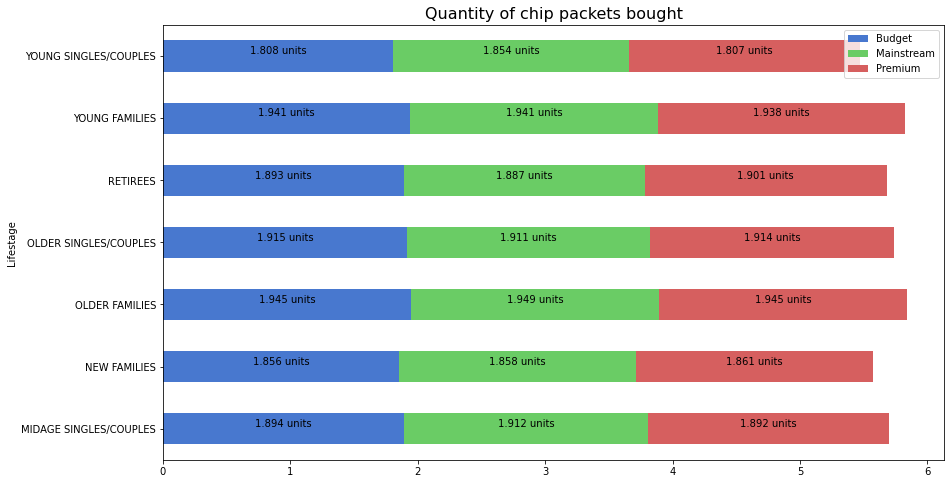

In [45]:
df_qty = pd.DataFrame({'Lifestage':lifestage_qty,
                  'Budget': Budget_qty,
                  'Mainstream': Mainstream_qty,
                  'Premium':Premium_qty})

ax_1 = df_qty.set_index('Lifestage').plot(kind='barh', stacked=True,figsize = (14,8))

all_qty = Budget_qty+Mainstream_qty+Premium_qty

count=-1
for rec in ax_1.patches:
    height = rec.get_height()
    width = rec.get_width()
    count = count+1
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.3f} units".format(all_qty[count]),
              ha='center', 
              va='bottom')
    
plt.title('Quantity of chip packets bought',fontsize=16);

This shows the average unit of chips bought by each category.
Older families and young families in general buy more chips per customer

In [46]:
#Calculating and plotting the average price per chips packet by those two dimensions.
df_grouped['PRICE_PER_UNIT'] = df_grouped['TOT_SALES']/df_grouped['PROD_QTY']


In [47]:
average_price_series = pd.Series(df_grouped['PRICE_PER_UNIT'])

lifestage_price = ['MIDAGE SINGLES/COUPLES','NEW FAMILIES','OLDER FAMILIES','OLDER SINGLES/COUPLES','RETIREES','YOUNG FAMILIES','YOUNG SINGLES/COUPLES']
Premium_price = []
Budget_price = []
Mainstream_price = []
all_values_price = []
for index,value in average_price_series.iteritems():
    if(index[1] == 'Premium'):
        Premium_price.append(value)
        all_values_price.append(value)
    elif(index[1] == 'Mainstream'):
        Mainstream_price.append(value)
        all_values_price.append(value)
    elif(index[1] == 'Budget'):
        Budget_price.append(value)
        all_values_price.append(value)

Total = sum(all_values_price)

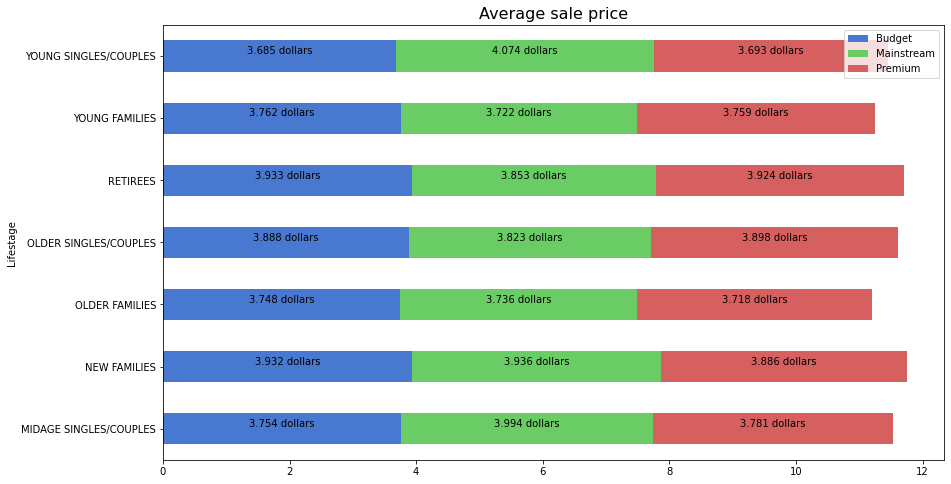

In [48]:
df_price = pd.DataFrame({'Lifestage':lifestage_price,
                  'Budget': Budget_price,
                  'Mainstream': Mainstream_price,
                  'Premium':Premium_price})

ax_1 = df_price.set_index('Lifestage').plot(kind='barh', stacked=True,figsize = (14,8))

all_price = Budget_price+Mainstream_price+Premium_price

count=-1
for rec in ax_1.patches:
    height = rec.get_height()
    width = rec.get_width()
    count = count+1
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.3f} dollars".format(all_price[count]),
              ha='center', 
              va='bottom')
    
plt.title('Average sale price',fontsize=16);

Mainstream midage and young singles and couples are more willing to pay more per
packet of chips compared to their budget and premium counterparts. This may be due
to premium shoppers being more likely to buy healthy snacks and when they buy
chips, this is mainly for entertainment purposes rather than their own consumption.
This is also supported by there being fewer premium midage and young singles and
couples buying chips compared to their mainstream counterparts.


In [49]:
unique_customers = pd.Series(df_merged.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].unique())
count = []
indices = []

for index,value in unique_customers.iteritems():
    count.append(len(value))
    indices.append(index[0]+'__'+index[1])
   

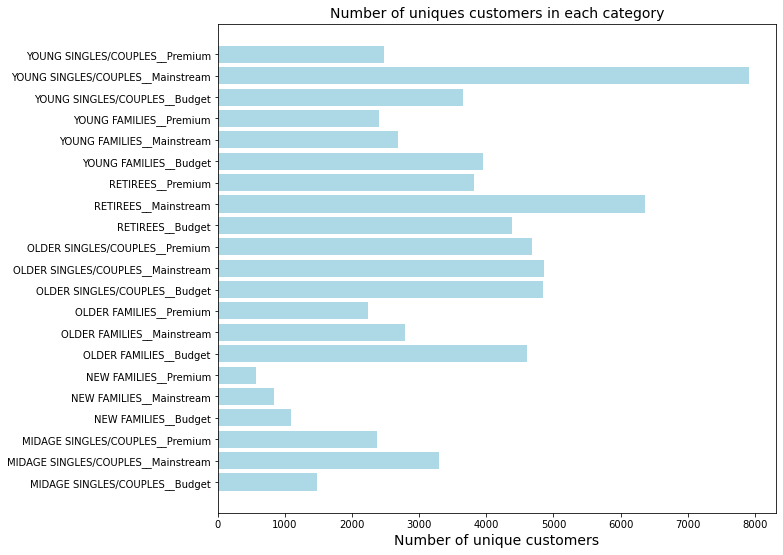

In [50]:
plt.figure(figsize=(10,9))
plt.barh(indices,count,color='lightblue')
plt.xlabel('Number of unique customers',fontsize=14)
plt.title('Number of uniques customers in each category',fontsize=14);

Young sigle/couples have large number of unique customers and the average price they spend upon each chip packet is also large and the average quantity of chip packets bought is also resonable.

Midage singles/couples have lesser customers but their average price spent of chips packets and the quantity of chip packets bought is almost same as Young singls/couples.

New Families (premium,budget,mainstream) have the least number of customers and leat number of unique customers but their average sale price is comparatively high

In [51]:
df_ptest_1 = df_merged[(df_merged['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (df_merged['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES')]

sales_mainstream_series = pd.Series(df_ptest_1['TOT_SALES'][df_ptest_1['PREMIUM_CUSTOMER'] == 'Mainstream'])
sales_budget_premium_series = pd.Series(df_ptest_1['TOT_SALES'][(df_ptest_1['PREMIUM_CUSTOMER'] == 'Budget') | (df_ptest_1['PREMIUM_CUSTOMER'] == 'Premium')])


mainstream_list = []
budget_premium_list = []
for index,value in sales_mainstream_series.iteritems():
    mainstream_list.append(value)
    
for index,value in sales_budget_premium_series.iteritems():
    budget_premium_list.append(value)
    

In [52]:
from scipy.stats import ttest_ind

stat,pvalue = ttest_ind(mainstream_list,budget_premium_list,equal_var=False)

print('Pvalue is {}'.format(pvalue))
pvalue<0.00000000001

Pvalue is 1.834645908183037e-237


True

The t-test results in a p-value of almost 0, i.e. the Total sales for mainstream,
young and mid-age singles and couples ARE significantly higher than
that of budget or premium, young and midage singles and couples.

We have found quite a few interesting insights that we can dive deeper into. 
We might want to target customer segments that contribute the most to sales to
retain them or further increase sales. Let's look at Mainstream - young
singles/couples. For instance, let's find out if they tend to buy a particular
brand of chips.

In [53]:
#INSIGHTS UPON MAINSTREAM CUSTOMERS.


df_mainstream = df_merged[df_merged['PREMIUM_CUSTOMER'] == 'Mainstream']

mainstream_grouped = pd.Series(df_mainstream.groupby(['BRAND_NAME'])['LYLTY_CARD_NBR'])

brand_names = []
counts = []

for index,value in mainstream_grouped.iteritems():
    brand_names.append(value[0])
    counts.append(len(value[1]))
    
brand_names.pop(14)
counts.pop(14)


544

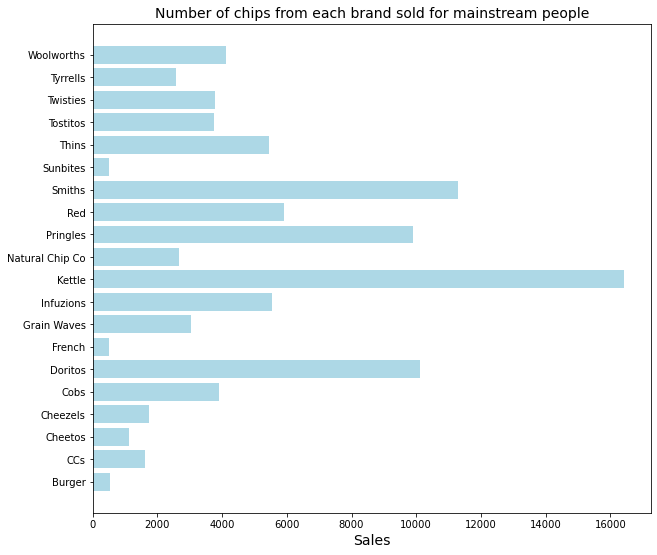

In [54]:
plt.figure(figsize=(10,9))
plt.barh(brand_names,counts,color='lightblue')
plt.xlabel('Sales',fontsize=14)
plt.title('Number of chips from each brand sold for mainstream people',fontsize=14);

Here we can see that mainstream people buy Kettle brand chips the most. After kettle they prefer either Doritos or Smiths.

Comapny's such as French, Snbites, Burger etc have extremly low sales for mainstream category people

In [55]:
#INSIGHTS UPON YOUNG SINGLES/COUPLES

df_young_premium = df_merged[(df_merged['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') &(df_merged['PREMIUM_CUSTOMER']=='Premium')]
df_young_mainstream = df_merged[(df_merged['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') &(df_merged['PREMIUM_CUSTOMER']=='Mainstream')]
df_young_budget = df_merged[(df_merged['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') &(df_merged['PREMIUM_CUSTOMER']=='Budget')]

In [56]:
#for PREMIUM

premium_series = pd.Series(df_young_premium.groupby('BRAND_NAME')['LYLTY_CARD_NBR'].count())

premium_series.sort_values(inplace=True)

brand_names = []
counts = []

for index,value in premium_series.iteritems():
    brand_names.append(index)
    counts.append(value)
 
brand_names.pop(0)
counts.pop(0)


41

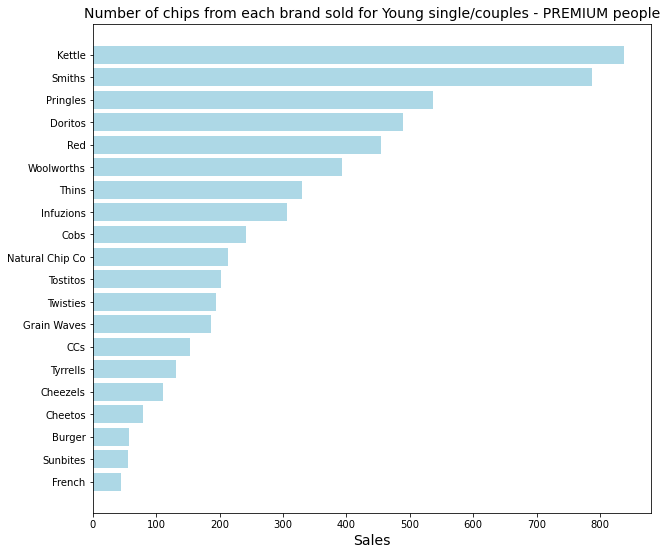

In [57]:
plt.figure(figsize=(10,9))
plt.barh(brand_names,counts,color='lightblue')
plt.xlabel('Sales',fontsize=14)
plt.title('Number of chips from each brand sold for Young single/couples - PREMIUM people',fontsize=14);

In [58]:
#for MAINSTREAM

mainstream_series = pd.Series(df_young_mainstream.groupby('BRAND_NAME')['LYLTY_CARD_NBR'].count())

mainstream_series.sort_values(inplace=True)

brand_names = []
counts = []

for index,value in mainstream_series.iteritems():
    brand_names.append(index)
    counts.append(value)
 

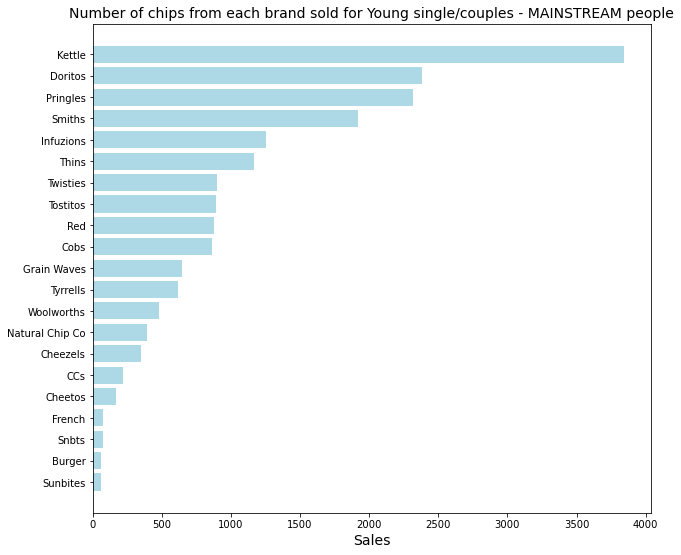

In [59]:
plt.figure(figsize=(10,9))
plt.barh(brand_names,counts,color='lightblue')
plt.xlabel('Sales',fontsize=14)
plt.title('Number of chips from each brand sold for Young single/couples - MAINSTREAM people',fontsize=14);

In [60]:
#for BUDGET

budget_series = pd.Series(df_young_budget.groupby('BRAND_NAME')['LYLTY_CARD_NBR'].count())

budget_series.sort_values(inplace=True)

brand_names = []
counts = []

for index,value in budget_series.iteritems():
    brand_names.append(index)
    counts.append(value)
 

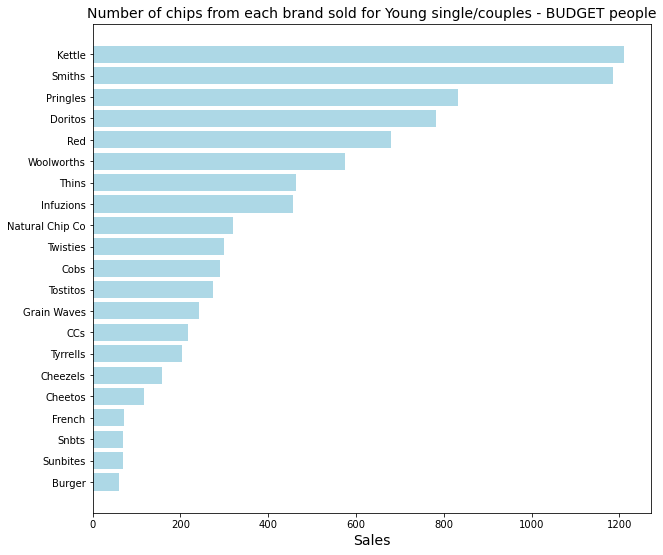

In [61]:
plt.figure(figsize=(10,9))
plt.barh(brand_names,counts,color='lightblue')
plt.xlabel('Sales',fontsize=14)
plt.title('Number of chips from each brand sold for Young single/couples - BUDGET people',fontsize=14);

In [104]:
#Most bought pack size for mainstream people
import statistics
from statistics import mode

brands_mstream = df_mainstream['PROD_NAME']

pack_size_mstream = []

for item in brands_mstream:
    if(item == 'Kettle 135g Swt Pot Sea Salt'):
        pack_size_mstream.append(int(item[7:10]))
    else:
        pack_size_mstream.append(int(item[-4:-1]))

print('Most frequently bought pack size for MAINSTREAM people is {}g'.format(mode(pack_size_mstream)))

Most frequently bought pack size for MAINSTREAM people is 175g


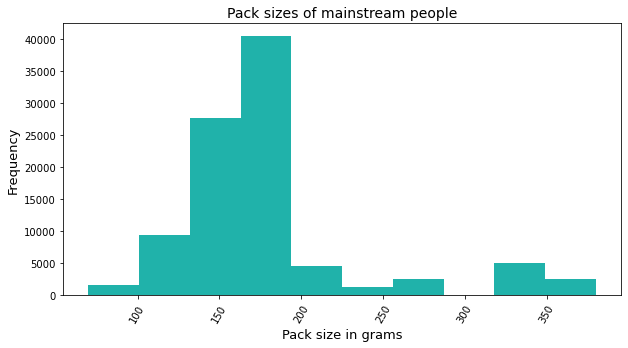

In [105]:
#Histogram of all pack sizes

plt.figure(figsize=(10,5))
plt.hist(pack_size_mstream,color='lightseagreen')
plt.xticks(rotation=60)
plt.title("Pack sizes of mainstream people",fontsize=14)
plt.xlabel('Pack size in grams',fontsize=13)
plt.ylabel('Frequency',fontsize=13);

In [102]:
#YOUNG - PREMIUM
import statistics
from statistics import mode


brands_yp = df_young_premium['PROD_NAME']

pack_size_yp = []

for item in brands_yp:
    if(item == 'Kettle 135g Swt Pot Sea Salt'):
        pack_size_yp.append(int(item[7:10]))
    else:
        pack_size_yp.append(int(item[-4:-1]))

print('Most frequently bought pack size for young premium people is {}g'.format(mode(pack_size_yp)))

Most frequently bought pack size for young premium people is 175g


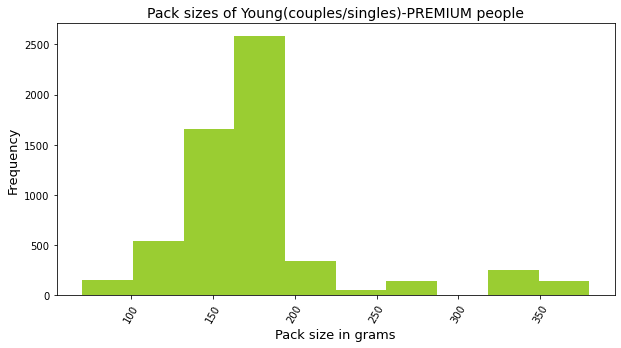

In [108]:
#Histogram of all pack sizes
plt.figure(figsize=(10,5))
plt.hist(pack_size_yp,color='yellowgreen')
plt.xticks(rotation=60)
plt.title("Pack sizes of Young(couples/singles)-PREMIUM people",fontsize=14)
plt.xlabel('Pack size in grams',fontsize=13)
plt.ylabel('Frequency',fontsize=13);

In [106]:
#YOUNG - MAINSTREAM
import statistics
from statistics import mode


brands_ym = df_young_mainstream['PROD_NAME']

pack_size_ym = []

for item in brands_ym:
    if(item == 'Kettle 135g Swt Pot Sea Salt'):
        pack_size_ym.append(int(item[7:10]))
    else:
        pack_size_ym.append(int(item[-4:-1]))

print('Most frequently bought pack size for young mainstream people is {}g'.format(mode(pack_size_ym)))

Most frequently bought pack size for young mainstream people is 175g


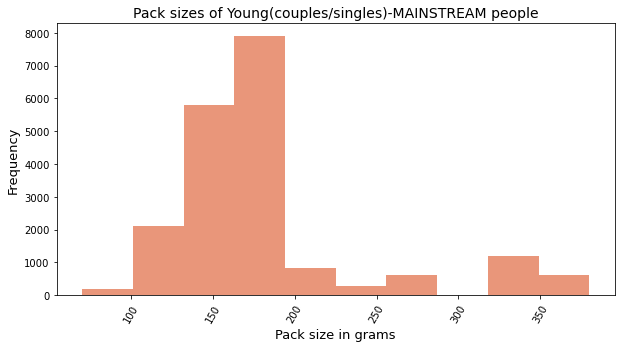

In [107]:
#Histogram of all pack sizes
plt.figure(figsize=(10,5))
plt.hist(pack_size_ym,color='darksalmon')
plt.xticks(rotation=60)
plt.title("Pack sizes of Young(couples/singles)-MAINSTREAM people",fontsize=14)
plt.xlabel('Pack size in grams',fontsize=13)
plt.ylabel('Frequency',fontsize=13);

In [111]:
#YOUNG -BUDGET
import statistics
from statistics import mode


brands_yb = df_young_budget['PROD_NAME']

pack_size_yb = []

for item in brands_yb:
    if(item == 'Kettle 135g Swt Pot Sea Salt'):
        pack_size_yb.append(int(item[7:10]))
    else:
        pack_size_yb.append(int(item[-4:-1]))

print('Most frequently bought pack size for young budget people is {}g'.format(mode(pack_size_yb)))

Most frequently bought pack size for young budget people is 175g


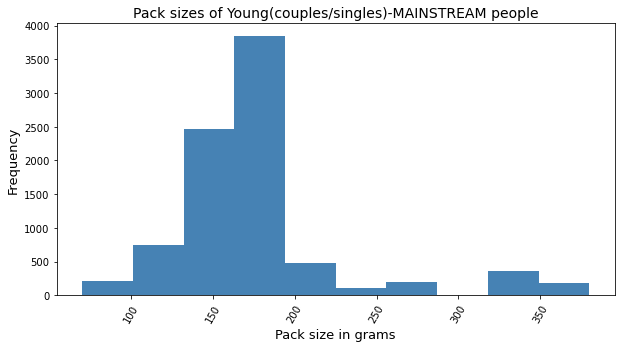

In [112]:
#Histogram of all pack sizes
plt.figure(figsize=(10,5))
plt.hist(pack_size_yb,color='steelblue')
plt.xticks(rotation=60)
plt.title("Pack sizes of Young(couples/singles)-MAINSTREAM people",fontsize=14)
plt.xlabel('Pack size in grams',fontsize=13)
plt.ylabel('Frequency',fontsize=13);

We can see that : 

[INSIGHTS]

1.Kettles, Pringles, Doritos, Smiths are the brands which are loved by all customers of all age groups wether singles or couples. These brands are also affodable and genrally preffered by Budget , Mainstream and Premium all 3 of them.

2.The sales to Young single/couple(mainstream),older families(budget), retirees(mainstream) is the highest.

3.There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget - Older families segment.

4.The average quantity of chip packets bought by each category is almost the same.

5.Young singles/couples(Mainstream), Retiress(mainstream) have the largest number of unique customers.

6.Young sigle/couples have large number of unique customers and the average price they spend upon each chip packet is also large and the average quantity of chip packets bought is also resonable.

7.Midage singles/couples have lesser customers but their average price spent of chips packets and the quantity of chip packets bought is almost same as Young singls/couples.

8.New Families (premium,budget,mainstream) have the least number of customers and leat number of unique customers but their average sale price is comparatively high.

9.The t-test results in a p-value of almost 0, i.e. the Total sales for mainstream, young and mid-age singles and couples ARE significantly higher than that of budget or premium, young and midage singles and couples.

10.Most sold chips brands for mainstream people are Kettles,Smiths, Doritos, Pringles repectively.

In depth insights about Young(singles/couples) as they are major customers.

11.['French','Sunbites','Burger','Cheetos', 'Cheezels','Tyrrells', 'CCs','Grain Waves', 'Twisties', 'Tostitos','Natural Chip Co','Cobs','Infuzions', 'Thins', 'Woolworths', 'Red', 'Doritos', 'Pringles','Smiths', 'Kettle']

From the least sold brands to the most sold brands for Young (single/couples) PREMIUM.

12.['Sunbites', 'Burger', 'Snbts', 'French', 'Cheetos', 'CCs', 'Cheezels', 'Natural Chip Co', 'Woolworths', 'Tyrrells', 'Grain Waves', 'Cobs', 'Red', 'Tostitos', 'Twisties', 'Thins', 'Infuzions', 'Smiths', 'Pringles', 'Doritos', 'Kettle']

From the least sold brands to the most sold brands for Young (single/couples) MAINSTREAM.

13.['Burger', 'Sunbites', 'Snbts', 'French', 'Cheetos', 'Cheezels', 'Tyrrells', 'CCs', 'Grain Waves', 'Tostitos', 'Cobs', 'Twisties', 'Natural Chip Co', 'Infuzions', 'Thins', 'Woolworths', 'Red', 'Doritos', 'Pringles', 'Smiths', 'Kettle']

14.Most frequently bought pack size for young budget,young mainstream,youn premium, all Mainstream people is 175g. The histogram trends for pack sizes of all groups is almost same(Tested ones with max customers).Hence we can say that the sale of packets of 175g is highest for all groups.

